## Detection of dolphin whistles on each file & encounter
## Use the trained model to extract features and then apply RNN

In [143]:
import os
import numpy as np
import librosa
import tensorflow as tf

In [144]:
from math import floor
from lib_augment import load_and_normalize
from lib_feature import feature_whistleness

%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# mapping folder name to species id

In [145]:
# loading the trained model
from tensorflow.keras.models import load_model
import tensorflow_addons.layers.spatial_pyramid_pooling as spp


model_whistleness_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_whistleness/2021-02-02_200514_resnet18_expt_alldata_run0_f1_lr_0.001/epoch_163_valloss_0.2434_valacc_0.9472.hdf5'
model_whistleness = load_model(model_whistleness_path)
model_whistleness.summary()

# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210303_233728/STAR2000/epoch_53_valloss_0.9505_valacc_0.7552.hdf5'
# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210305_105231/STAR2000/epoch_56_valloss_0.1945_valacc_0.7305.hdf5'
model_species_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210310_095616/STAR2000/epoch_48_valloss_0.1938_valacc_0.7403.hdf5'

model_species = load_model(model_species_path)
model_species.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128, 1) 0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 100, 128, 16) 144         input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 100, 128, 16) 64          conv0[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 128, 16) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [86]:
# training

In [97]:
def enounter_features(encounter_folder):
    sound_files = os.listdir(encounter_folder)

    spec_feas_curr = []
    # for ff in sound_files:
    for ff in sound_files[:2]:
    # for ff in [sound_files[1]]:
        print(ff)
        samples, _ = librosa.load(os.path.join(encounter_folder, ff), sr=fs)
        print('Sound length: '+str(samples.shape[0]/fs))
        if samples.ndim >= 2:
            samples = samples[:, 0]

        for ss in range(floor((samples.shape[0]-win_size)/step_size)+1):
            samples_curr = samples[ss*step_size:ss*step_size+win_size]
            samples_curr = samples_curr - samples_curr.mean()

            spectro = librosa.feature.melspectrogram(samples_curr,sr=fs, hop_length=960)
            # spectro = librosa.feature.melspectrogram(samples_curr,sr=fs)
            spec_feas_curr.append(feature_whistleness(spectro))
    spec_feas = np.stack(spec_feas_curr)
    spec_feas = np.expand_dims(spec_feas[:, :100, :], axis=3)
    
    # score = model_species.predict(spec_feas)
    
    return spec_feas

In [278]:
# deploy_path_train1 = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_train1 = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
deploy_path_train1 = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_train1 = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #

step_sec = 0.5
# step_size = int(1.0*fs)
step_size = int(step_sec*fs)
win_size = int(2.0*fs)

In [279]:
encounter_train1 =  os.listdir(deploy_path_train1)
encounter_train1.sort()

In [280]:
encounter_train1

['bottlenose s165',
 'pilot s219',
 'pilot s228',
 'pilot s261',
 'pilot s317',
 'pilot s318',
 'roughtoothed s125',
 'roughtoothed s167',
 'roughtoothed s194',
 'roughtoothed s234',
 'roughtoothed s245',
 'spinner s132',
 'spotted s129',
 'spotted s138',
 'spotted s195',
 'spotted s280',
 'spotted s296',
 'striped s124',
 'striped s160',
 'striped s189',
 'striped s205',
 'striped s244']

In [281]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [282]:
encounter_test

['bottlenose s352',
 'bottlenose s46',
 'longbeaked_common s329',
 'longbeaked_common s338',
 'pilot s288',
 'roughtoothed s417',
 'shortbeaked_common s282',
 'shortbeaked_common s302',
 'shortbeaked_common s303',
 'shortbeaked_common s313',
 'shortbeaked_common s346',
 'shortbeaked_common s368',
 'shortbeaked_common s374',
 'shortbeaked_common s375',
 'shortbeaked_common s376',
 'shortbeaked_common s377',
 'shortbeaked_common s378',
 'shortbeaked_common s48',
 'shortbeaked_common s515',
 'shortbeaked_common s561',
 'spinner s111',
 'spinner s447',
 'spinner s459',
 'spinner s522',
 'spinner s63',
 'spotted s125',
 'spotted s394',
 'spotted s42',
 'spotted s498',
 'striped s17',
 'striped s274',
 'striped s380',
 'striped s39',
 'striped s395',
 'striped s396',
 'striped s398',
 'striped s399',
 'striped s445',
 'striped s455',
 'striped s472',
 'striped s483',
 'striped s6',
 'striped s88',
 'striped s92']

In [292]:
### run on a encounter encounter[0]
ee = encounter_train1[5]
print(ee+'\n')

encounter_folder = os.path.join(deploy_path_train1, ee)
spec_feas = enounter_features(encounter_folder)

pilot s318

HICEAS021204-155619.wav
Sound length: 45.32
HICEAS021204-160808.wav
Sound length: 60.0


In [293]:
whistleness = model_whistleness.predict(spec_feas)
scores = model_species.predict(spec_feas)

In [294]:
whistleness_bin = whistleness[:, 1]>0.9

In [295]:
# for those sound clips trained well, extract features in 3 s and re-train

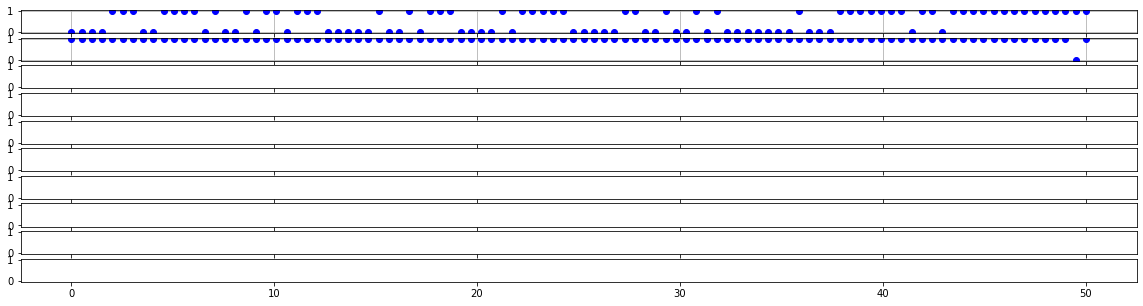

In [296]:
# for tt in range(0, 1800, 100):
fig, ax = plt.subplots(10, 1, figsize=(20, 5), sharex=True, sharey=True)
# for tt in range(0, min(1000, int(floor(whistleness.shape[0]/100.))*100 ), 100):
for ii in range(min(10, int(floor(whistleness_bin.shape[0]/100.)))):
    tt = ii*100
    ax[ii].plot(np.linspace(0, 100*step_sec, num=100), whistleness_bin[tt:tt+100].T, 'bo')
    ax[ii].grid()
# plt.colorbar()

In [297]:
scores.shape

(204, 8)

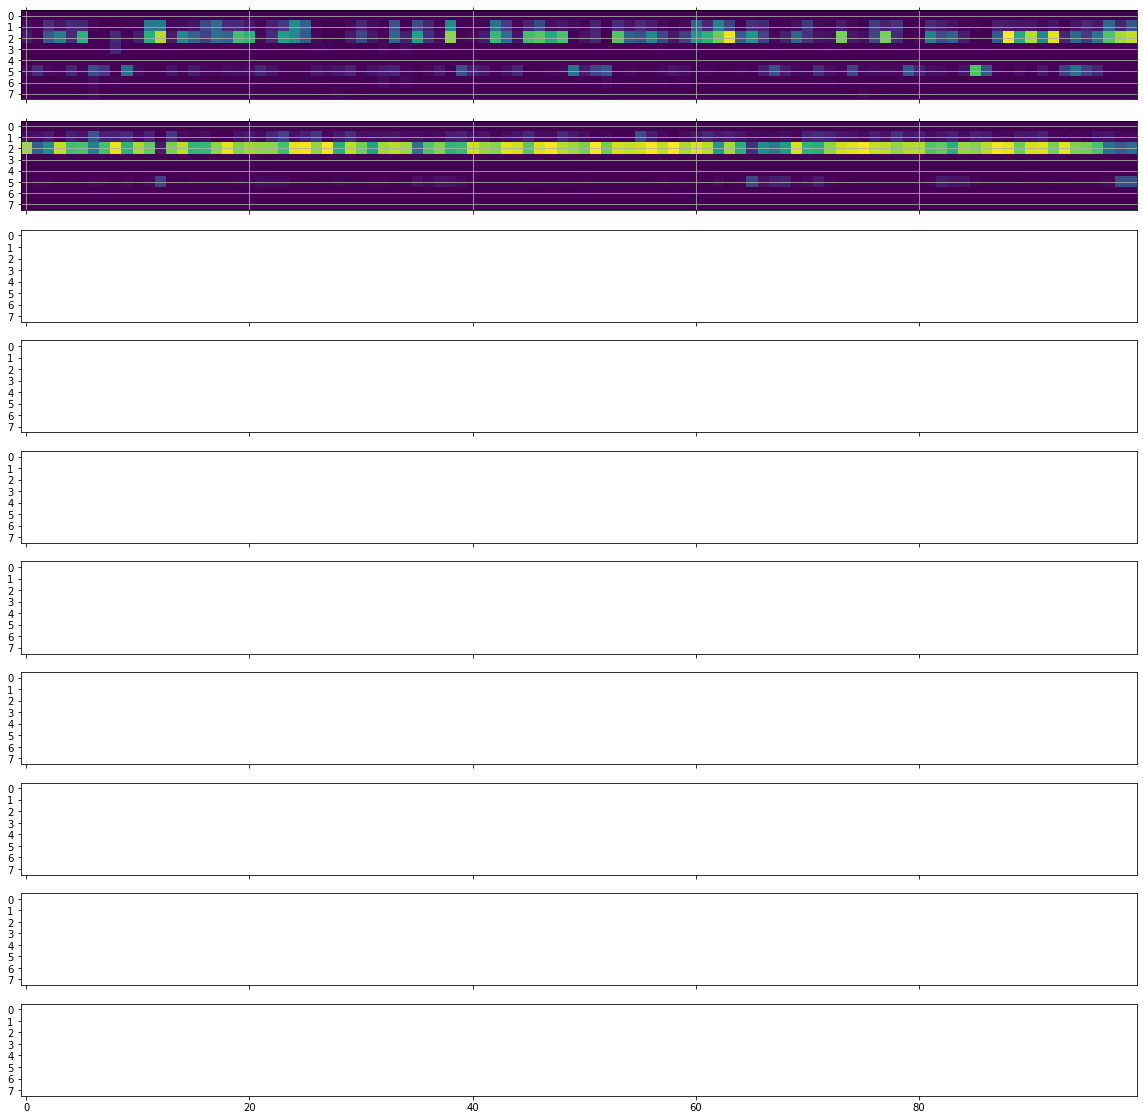

In [298]:
# # for tt in range(0, 1800, 100):
# for tt in range(0, min(1000, int(floor(scores.shape[0]/100.))*100 ), 100):
#     plt.matshow(scores[tt:tt+100, :].T)
# # plt.colorbar()

fig, ax = plt.subplots(10, 1, figsize=(20, 20), sharex=True, sharey=True)
for ii in range(min(10, int(floor(scores.shape[0]/100.)))):
    tt = ii*100
    ax[ii].matshow(scores[tt:tt+100, :].T)
    ax[ii].grid()


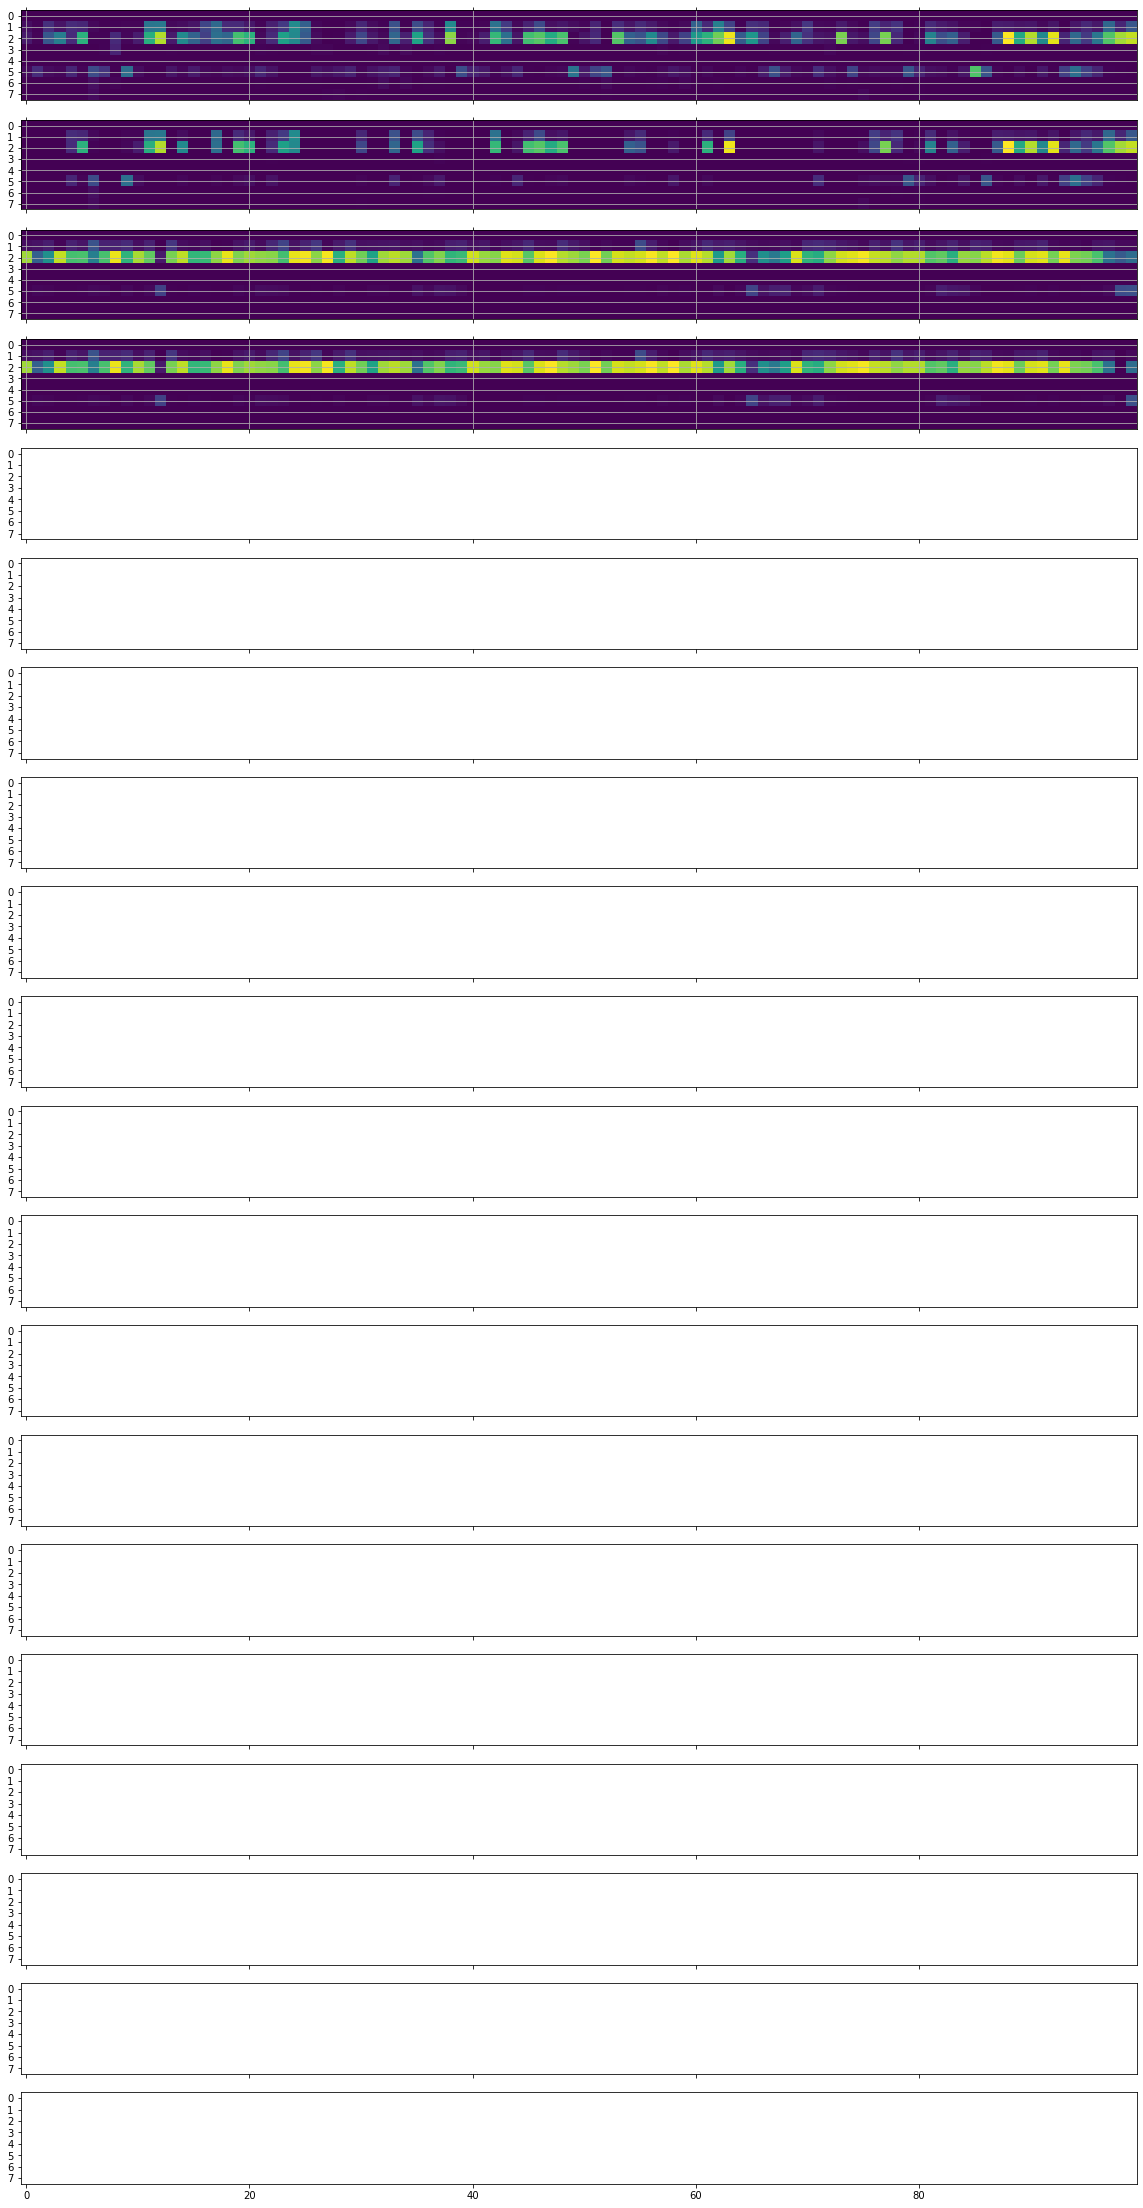

In [299]:
fig, ax = plt.subplots(20, 1, figsize=(20, 40), sharex=True, sharey=True)
for ii in range(min(10, int(floor(scores.shape[0]/100.)))):
    tt = ii*100
    # species
    ax[2*ii].matshow(scores[tt:tt+100, :].T)
    ax[2*ii].grid()
    
    # species scores x whistleness
    ax[2*ii+1].matshow((scores[tt:tt+100, :]*(np.multiply(whistleness_bin[tt:tt+100].reshape(-1, 1), np.ones((1,8))))).T)
    ax[2*ii+1].grid()
    

In [78]:
# get the model layer before the spatial pyramid pooling

In [79]:
inputs = tf.keras.Input(shape=(100, 128, 1))

In [80]:
base_model.layers

In [81]:
base_model.layers[40]

In [82]:
x = base_model.layers[0](inputs)
for ii in range(1,40-1):
    x = base_model.layers[ii](x)
outputs = base_model.layers[39](x)

In [83]:
model_new = tf.keras.Model(inputs, outputs)

In [84]:
model_new.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 128, 1)]     0         
_________________________________________________________________
input (InputLayer)           multiple                  0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 128, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 128, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 100, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 128, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 128, 16)      64  

In [85]:
# Build a new model to combine the features, either by (1) SPP or (2) attention pooling

In [60]:
scores.shape

(1588, 8)

In [ ]:
spec_feas.shape

In [ ]:
spp_fea = model_new.predict(spec_feas)

In [ ]:
spp_fea.shape

## Bottlenoise dolphin

In [ ]:
# run on a encounter encounter[0]
ee = encounter[0]
print(ee)
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Common dolphin

In [ ]:
ee = encounter[10]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Spinner

In [ ]:
ee = encounter[20]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Stripped dolphin

In [ ]:
ee = encounter[30]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Stripped dolphin

In [ ]:
ee = encounter[40]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

In [ ]:
plt.plot(score[:, 1])